In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mengary-revenue/train.csv
/kaggle/input/mengary-revenue/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [3]:
train_raw=pd.read_csv('../input/mengary-revenue/train.csv')
test_raw=pd.read_csv('../input/mengary-revenue/test.csv')
train_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01


In [4]:
train_raw.isna().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [5]:
train_raw.dropna(inplace=True)
train_raw.isna().sum()


id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      0
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [6]:
test_raw.isna().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      0
RID                0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [7]:

all_subclass=set(train_raw['sub-class'])
for i,cls in enumerate(all_subclass):
  print(cls,' price from ',train_raw.loc[train_raw['sub-class']==cls].price.min(),'to',train_raw.loc[train_raw['sub-class']==cls].price.max())


television  price from  1.344 to 1113.024
shorts  price from  2.328 to 1336.44
tablet  price from  2.088 to 629.184
laptop  price from  4.768 to 2934.33
headset  price from  0.836 to 9892.74
watch  price from  1.632 to 604.656
charger  price from  2.92 to 8187.65
colddrinks  price from  4.95 to 4548.81
sweets  price from  11.56 to 22638.48
tshirts  price from  29.98 to 3785.292
lighting  price from  1.24 to 93.36
pants  price from  35.49 to 4404.9
phone  price from  3.38 to 733.95
battery  price from  2.334 to 2625.12
hoodies  price from  27.414 to 4297.644
fastfood  price from  439.992 to 17499.95
chocolates  price from  1.98 to 3347.37


In [8]:
all_subclass=set(train_raw['discount'])
for i,cls in enumerate(all_subclass):
  print(cls,' price from ',train_raw.loc[train_raw['discount']==cls].price.min(),'to',train_raw.loc[train_raw['discount']==cls].price.max())


0.2  price from  1.344 to 4535.976
0.0  price from  1.24 to 17499.95
0.1  price from  29.403 to 3785.292
0.15  price from  119.833 to 3406.664
0.7  price from  0.852 to 4499.985
0.8  price from  0.836 to 2177.584
0.6  price from  2.328 to 419.68
0.4  price from  9.588 to 8399.976
0.5  price from  32.985 to 22638.48
0.3  price from  37.296 to 2453.43
0.32  price from  67.9932 to 2396.2656
0.45  price from  174.0585 to 957.5775


In [9]:
print('Mean profit:',train_raw.profit.mean())
print('Min profit:',train_raw.profit.min())
print('Max profit:',train_raw.profit.max())

Mean profit: 29.12400034333491
Min profit: -6599.978
Max profit: 8399.976


In [10]:
def bar_chart(feature):
    profit=train_raw[train_raw['profit']>29][feature].value_counts()
    loss=train_raw[train_raw['profit']<=29][feature].value_counts()
    df=pd.DataFrame([profit,loss])
    df.index=['profit','loss']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
def bar_price(feature):
    ten=train_raw[train_raw['price class']==10][feature].value_counts()
    twenty=train_raw[train_raw['price class']==20][feature].value_counts()
    thirty=train_raw[train_raw['price class']==30][feature].value_counts()
    forty=train_raw[train_raw['price class']==40][feature].value_counts()
    fifty=train_raw[train_raw['price class']==50][feature].value_counts()
    df=pd.DataFrame([ten,twenty,thirty,forty,fifty])
    df.index=['10','20','30','40','50']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

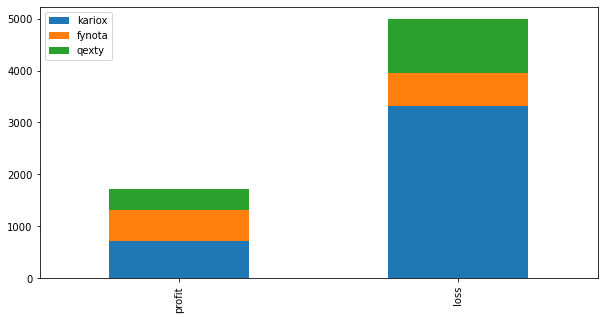

In [11]:
bar_chart('class')

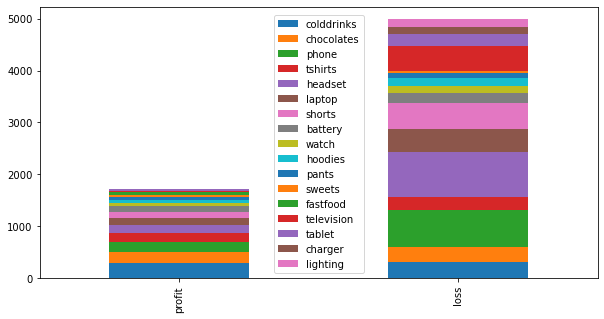

In [12]:
bar_chart('sub-class')

In [13]:
#creating new class price
price_class=[]
for i,j in train_raw.iterrows():
  if (train_raw.loc[i,'price']<50):
    price_class.append(10)
  elif (train_raw.loc[i,'price']>=50 and train_raw.loc[i,'price']<100):
    price_class.append(20)
  elif (train_raw.loc[i,'price']>=100 and train_raw.loc[i,'price']<200):
    price_class.append(30)
  elif (train_raw.loc[i,'price']>=200 and train_raw.loc[i,'price']<1000):
    price_class.append(40)
  else:price_class.append(50) 
train_raw['price class']=price_class
train_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,price class
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,10
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,10
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,10
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,10
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01,40
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01,40
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01,10
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01,40


In [14]:
#creating new class price for test
price_class=[]
for i,j in test_raw.iterrows():
  if (test_raw.loc[i,'price']<50):
    price_class.append(10)
  elif (test_raw.loc[i,'price']>=50 and test_raw.loc[i,'price']<100):
    price_class.append(20)
  elif (test_raw.loc[i,'price']>=100 and test_raw.loc[i,'price']<200):
    price_class.append(30)
  elif (test_raw.loc[i,'price']>=200 and test_raw.loc[i,'price']<1000):
    price_class.append(40)
  else:price_class.append(50) 
test_raw['price class']=price_class


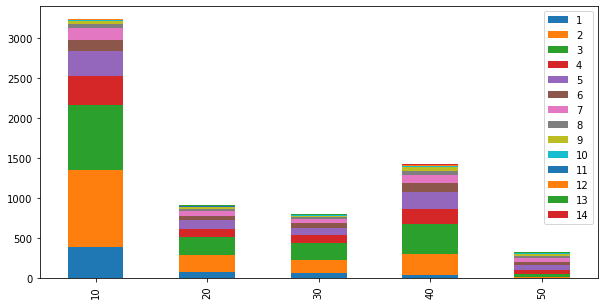

In [15]:
bar_price('no of items')

In [16]:
#creating new class price
price_no_of_items=[]
for i,j in train_raw.iterrows():
  if (train_raw.loc[i,'price class']==10)and (train_raw.loc[i,'no of items']==1 or train_raw.loc[i,'no of items']==2):
    price_no_of_items.append(11)
  elif (train_raw.loc[i,'price class']==10)and (train_raw.loc[i,'no of items']==3 or train_raw.loc[i,'no of items']==4):
    price_no_of_items.append(14)
  elif (train_raw.loc[i,'price class']==10)and (train_raw.loc[i,'no of items']>4):
    price_no_of_items.append(15)
  elif (train_raw.loc[i,'price class']==20)and (train_raw.loc[i,'no of items']==1 or train_raw.loc[i,'no of items']==2):
    price_no_of_items.append(21)
  elif (train_raw.loc[i,'price class']==20)and (train_raw.loc[i,'no of items']==3 or train_raw.loc[i,'no of items']==4):
    price_no_of_items.append(24)
  elif (train_raw.loc[i,'price class']==20)and (train_raw.loc[i,'no of items']>4):
    price_no_of_items.append(25)
  elif  (train_raw.loc[i,'price class']>20)and (train_raw.loc[i,'no of items']>0):
    price_no_of_items.append(30)
  
train_raw['price and item ']=price_no_of_items


In [17]:
#creating new class price on test
price_no_of_items=[]
for i,j in test_raw.iterrows():
  if (test_raw.loc[i,'price class']==10)and (test_raw.loc[i,'no of items']==1 or test_raw.loc[i,'no of items']==2):
    price_no_of_items.append(11)
  elif (test_raw.loc[i,'price class']==10)and (test_raw.loc[i,'no of items']==3 or test_raw.loc[i,'no of items']==4):
    price_no_of_items.append(14)
  elif (test_raw.loc[i,'price class']==10)and (test_raw.loc[i,'no of items']>4):
    price_no_of_items.append(15)
  elif (test_raw.loc[i,'price class']==20)and (test_raw.loc[i,'no of items']==1 or test_raw.loc[i,'no of items']==2):
    price_no_of_items.append(21)
  elif (test_raw.loc[i,'price class']==20)and (test_raw.loc[i,'no of items']==3 or test_raw.loc[i,'no of items']==4):
    price_no_of_items.append(24)
  elif (test_raw.loc[i,'price class']==20)and (test_raw.loc[i,'no of items']>4):
    price_no_of_items.append(25)
  elif  (test_raw.loc[i,'price class']>20)and (test_raw.loc[i,'no of items']>0):
    price_no_of_items.append(30)
  
test_raw['price and item ']=price_no_of_items


In [18]:
#new feature for discount price
train_raw['discounted price']=train_raw.price*(1-train_raw.discount)
train_raw['per unit price']=train_raw.price/train_raw['no of items']

test_raw['discounted price']=test_raw.price*(1-test_raw.discount)
test_raw['per unit price']=test_raw.price/test_raw['no of items']


In [19]:
#minmax mean feature
min=[]
max=[]
mean=[]

all_subclass=set(train_raw['sub-class'])
for i,j in train_raw.iterrows():
  sub=j['sub-class']
  for i,cls in enumerate(all_subclass):
    if cls==sub:
      min.append(train_raw.loc[train_raw['sub-class']==cls].price.min())
      max.append(train_raw.loc[train_raw['sub-class']==cls].price.max())
      mean.append(np.mean(train_raw.loc[train_raw['sub-class']==cls].price))
  
train_raw['subclass_mean']=mean
train_raw['subclass_min']=min
train_raw['subclass_max']=max
train_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,address code,departure state,placement date,price class,price and item,discounted price,per unit price,subclass_mean,subclass_min,subclass_max
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,...,77095,Texas,2018-01-01,10,11,13.1584,8.224,55.686325,3.380,733.950
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,...,48185,Michigan,2018-01-01,10,15,29.7000,5.940,127.636724,0.836,9892.740
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,...,48185,Michigan,2018-01-01,10,14,14.7300,4.910,97.956427,2.328,1336.440
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,...,48185,Michigan,2018-01-01,10,14,43.9200,14.640,35.501637,1.344,1113.024
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,...,48185,Michigan,2018-01-01,20,21,66.5800,33.290,277.615292,4.768,2934.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,...,5408,Vermont,2021-01-01,40,30,542.9400,180.980,215.095805,2.334,2625.120
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,...,95123,California,2021-01-01,40,30,221.4272,138.392,127.636724,0.836,9892.740
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,...,5408,Vermont,2021-01-01,10,11,2.0400,2.040,72.261859,1.632,604.656
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,...,10024,New York,2021-01-01,40,30,187.0614,69.282,544.632234,29.980,3785.292


In [20]:

#minmax mean feature


min=[]
max=[]
mean=[]

all_subclass=set(test_raw['sub-class'])
for i,j in test_raw.iterrows():
  sub=j['sub-class']
  for i,cls in enumerate(all_subclass):
    if cls==sub:
      min.append(test_raw.loc[test_raw['sub-class']==cls].price.min())
      max.append(test_raw.loc[test_raw['sub-class']==cls].price.max())
      mean.append(np.mean(test_raw.loc[test_raw['sub-class']==cls].price))
  
test_raw['subclass_mean']=mean
test_raw['subclass_min']=min
test_raw['subclass_max']=max
test_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,address code,departure state,placement date,price class,price and item,discounted price,per unit price,subclass_mean,subclass_min,subclass_max
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,...,94122,California,2021-01-01,10,15,24.2000,4.840,31.471562,1.640,385.600
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,...,94122,California,2021-01-01,40,30,287.9808,119.992,360.379363,2.970,4367.896
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,...,6708,Connecticut,2021-01-01,10,11,3.5200,1.760,31.471562,1.640,385.600
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,...,60653,Illinois,2021-01-01,10,15,9.2160,2.304,33.870316,2.464,786.480
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,...,98115,Washington,2021-01-01,40,30,242.9400,80.980,239.221812,4.464,2591.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,...,10035,New York,2021-12-01,10,14,31.9200,7.980,239.221812,4.464,2591.560
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,...,10035,New York,2021-12-01,10,14,19.4400,6.480,60.555444,3.424,629.100
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,...,10035,New York,2021-12-01,40,30,272.9400,90.980,239.221812,4.464,2591.560
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,...,94110,California,2021-12-01,30,30,90.8544,56.784,504.478873,26.640,4416.174


In [21]:

dis_min=[]
dis_max=[]
dis_mean=[]

all_subclass=set(train_raw['sub-class'])
for i,j in train_raw.iterrows():
  sub=j['sub-class']
  for i,cls in enumerate(all_subclass):
    if cls==sub:
      dis_min.append(train_raw.loc[train_raw['sub-class']==cls].discount.min())
      dis_max.append(train_raw.loc[train_raw['sub-class']==cls].discount.max())
      dis_mean.append(np.mean(train_raw.loc[train_raw['sub-class']==cls].discount))
  
train_raw['subclass_discount_mean']=dis_mean
train_raw['subclass_discount_min']=dis_min
train_raw['subclass_discount_max']=dis_max
train_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,price class,price and item,discounted price,per unit price,subclass_mean,subclass_min,subclass_max,subclass_discount_mean,subclass_discount_min,subclass_discount_max
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,...,10,11,13.1584,8.224,55.686325,3.380,733.950,0.072368,0.0,0.2
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,...,10,15,29.7000,5.940,127.636724,0.836,9892.740,0.369561,0.0,0.8
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,...,10,14,14.7300,4.910,97.956427,2.328,1336.440,0.142902,0.0,0.6
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,...,10,14,43.9200,14.640,35.501637,1.344,1113.024,0.072904,0.0,0.2
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,...,20,21,66.5800,33.290,277.615292,4.768,2934.330,0.073703,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,...,40,30,542.9400,180.980,215.095805,2.334,2625.120,0.160066,0.0,0.8
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,...,40,30,221.4272,138.392,127.636724,0.836,9892.740,0.369561,0.0,0.8
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,...,10,11,2.0400,2.040,72.261859,1.632,604.656,0.077838,0.0,0.2
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,...,40,30,187.0614,69.282,544.632234,29.980,3785.292,0.171262,0.0,0.3


In [22]:
#minmax mean feature
dis_min=[]
dis_max=[]
dis_mean=[]

all_subclass=set(test_raw['sub-class'])
for i,j in test_raw.iterrows():
  sub=j['sub-class']
  for i,cls in enumerate(all_subclass):
    if cls==sub:
      dis_min.append(test_raw.loc[test_raw['sub-class']==cls].discount.min())
      dis_max.append(test_raw.loc[test_raw['sub-class']==cls].discount.max())
      dis_mean.append(np.mean(test_raw.loc[test_raw['sub-class']==cls].discount))
  
test_raw['subclass_discount_mean']=dis_mean
test_raw['subclass_discount_min']=dis_min
test_raw['subclass_discount_max']=dis_max
test_raw

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,...,price class,price and item,discounted price,per unit price,subclass_mean,subclass_min,subclass_max,subclass_discount_mean,subclass_discount_min,subclass_discount_max
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,...,10,15,24.2000,4.840,31.471562,1.640,385.600,0.078445,0.0,0.2
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,...,40,30,287.9808,119.992,360.379363,2.970,4367.896,0.164384,0.0,0.4
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,...,10,11,3.5200,1.760,31.471562,1.640,385.600,0.078445,0.0,0.2
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,...,10,15,9.2160,2.304,33.870316,2.464,786.480,0.063158,0.0,0.2
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,...,40,30,242.9400,80.980,239.221812,4.464,2591.560,0.076655,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,...,10,14,31.9200,7.980,239.221812,4.464,2591.560,0.076655,0.0,0.2
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,...,10,14,19.4400,6.480,60.555444,3.424,629.100,0.080088,0.0,0.2
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,...,40,30,272.9400,90.980,239.221812,4.464,2591.560,0.076655,0.0,0.2
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,...,30,30,90.8544,56.784,504.478873,26.640,4416.174,0.167725,0.0,0.3


In [23]:
#mean discount
mean_discount=[]

all_discount=set(train_raw['discount'])
for i,j in train_raw.iterrows():
  sub=j['discount']
  for i,cls in enumerate(all_discount):
    if cls==sub:
      mean=np.mean(train_raw.loc[train_raw['discount']==cls].price)*(1-train_raw.loc[i,'discount'])
      mean_discount.append(mean)

train_raw['mean discount']=mean_discount


In [24]:
#mean discount
mean_discount=[]

all_discount=set(test_raw['discount'])
for i,j in test_raw.iterrows():
  sub=j['discount']
  for i,cls in enumerate(all_discount):
    if cls==sub:
      mean=np.mean(test_raw.loc[test_raw['discount']==cls].price)*(1-test_raw.loc[i,'discount'])
      mean_discount.append(mean)

test_raw['mean discount']=mean_discount

In [25]:
#delay feature
year=[]
delivery_month=[]
placement_month=[]
delay=[]
for i,row in train_raw.iterrows():
  delivery=train_raw.loc[i,'delivery date']
  placement=train_raw.loc[i,'placement date']
  (y, m, d) = delivery.split('-')
  (yp, mp, dp) = placement.split('-')
  d=int(m)-int(mp)
  delay.append(d)
  year.append(int(y))
  delivery_month.append(int(m))
  placement_month.append(int(mp))
train_raw['delivery month']=delivery_month
train_raw['placement month']=placement_month 
train_raw['year']=year
train_raw['delay']=delay


In [26]:
#delay feature
year=[]
delivery_month=[]
placement_month=[]
delay=[]
for i,row in test_raw.iterrows():
  delivery=test_raw.loc[i,'delivery date']
  placement=test_raw.loc[i,'placement date']
  (y, m, d) = delivery.split('-')
  (yp, mp, dp) = placement.split('-')
  d=int(m)-int(mp)
  delay.append(d)
  year.append(int(y))
  delivery_month.append(int(m))
  placement_month.append(int(mp))
test_raw['delivery month']=delivery_month
test_raw['placement month']=placement_month 
test_raw['year']=year
test_raw['delay']=delay


In [27]:

#get dummies
cls=pd.get_dummies(train_raw['class'],prefix='class')
d_type=pd.get_dummies(train_raw['delivery type'],prefix='delivery')
subcls=pd.get_dummies(train_raw['sub-class'],prefix='sub-class')
train_raw.drop(['class','sub-class','delivery type'],axis=1,inplace=True)
train_raw=pd.concat([cls,d_type,subcls,train_raw],axis=1)


In [28]:
#get dummies
cls=pd.get_dummies(test_raw['class'],prefix='class')
d_type=pd.get_dummies(test_raw['delivery type'],prefix='delivery')
subcls=pd.get_dummies(test_raw['sub-class'],prefix='sub-class')
test_raw.drop(['class','sub-class','delivery type'],axis=1,inplace=True)
test_raw=pd.concat([cls,d_type,subcls,test_raw],axis=1)


In [29]:
train=train_raw.drop(['id','placement date','delivery date','RID','placement month','delivery month','year'],axis=1)
test=test_raw.drop(['id','placement date','delivery date','RID','placement month','delivery month','year'],axis=1)
#all_class=set(train['class'].sort_values(ascending=True))
all_cities=set(train['departure city'])
all_location=set(train['location'].sort_values(ascending=True))
all_seg=set(train['segment'].sort_values(ascending=True))
#all_subclass=set(train['sub-class'].sort_values(ascending=True))
#all_del_type=set(train['delivery type'].sort_values(ascending=True))
all_state=set(train['departure state'].sort_values(ascending=True))

for i,city in enumerate(all_cities):
  train.loc[train['departure city']==city,'departure city']=i
for i,loc in enumerate(all_location):
  train.loc[train['location']==loc,'location']=i
for i,loc in enumerate(all_seg):
  train.loc[train['segment']==loc,'segment']=i
#for i,loc in enumerate(all_subclass):
#  train.loc[train['sub-class']==loc,'sub-class']=i
#for i,loc in enumerate(all_del_type):
#  train.loc[train['delivery type']==loc,'delivery type']=i
for i,loc in enumerate(all_state):
  train.loc[train['departure state']==loc,'departure state']=i
train


,class_fynota,class_kariox,class_qexty,delivery_First Class,delivery_Same Day,delivery_Second Class,delivery_Standard Class,sub-class_battery,sub-class_charger,sub-class_chocolates,...,discounted price,per unit price,subclass_mean,subclass_min,subclass_max,subclass_discount_mean,subclass_discount_min,subclass_discount_max,mean discount,delay
0,0,1,0,0,0,0,1,0,0,0,...,13.1584,8.224,55.686325,3.380,733.950,0.072368,0.0,0.2,169.251411,0
1,0,1,0,0,0,0,1,0,0,0,...,29.7000,5.940,127.636724,0.836,9892.740,0.369561,0.0,0.8,231.395294,0
2,0,0,1,0,0,0,1,0,0,0,...,14.7300,4.910,97.956427,2.328,1336.440,0.142902,0.0,0.6,231.395294,0
3,0,1,0,0,0,0,1,0,0,0,...,43.9200,14.640,35.501637,1.344,1113.024,0.072904,0.0,0.2,231.395294,0
4,0,1,0,0,0,0,1,0,0,0,...,66.5800,33.290,277.615292,4.768,2934.330,0.073703,0.0,0.2,231.395294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0,1,0,0,0,0,1,1,0,0,...,542.9400,180.980,215.095805,2.334,2625.120,0.160066,0.0,0.8,231.395294,0
6696,0,1,0,0,0,0,1,0,0,0,...,221.4272,138.392,127.636724,0.836,9892.740,0.369561,0.0,0.8,169.251411,0
6697,0,1,0,0,0,0,1,0,0,0,...,2.0400,2.040,72.261859,1.632,604.656,0.077838,0.0,0.2,231.395294,0
6698,0,0,1,0,0,1,0,0,0,0,...,187.0614,69.282,544.632234,29.980,3785.292,0.171262,0.0,0.3,528.982676,0


In [30]:
all_cities=set(test['departure city'])
all_location=set(test['location'].sort_values(ascending=True))
all_seg=set(test['segment'].sort_values(ascending=True))
#all_subclass=set(test['sub-class'].sort_values(ascending=True))
#all_del_type=set(test['delivery type'].sort_values(ascending=True))
all_state=set(test['departure state'].sort_values(ascending=True))

for i,city in enumerate(all_cities):
  test.loc[test['departure city']==city,'departure city']=i
for i,loc in enumerate(all_location):
  test.loc[test['location']==loc,'location']=i
for i,loc in enumerate(all_seg):
  test.loc[test['segment']==loc,'segment']=i
#for i,loc in enumerate(all_subclass):
 # test.loc[test['sub-class']==loc,'sub-class']=i
#for i,loc in enumerate(all_del_type):
 # test.loc[test['delivery type']==loc,'delivery type']=i
for i,loc in enumerate(all_state):
  test.loc[test['departure state']==loc,'departure state']=i
test

,class_fynota,class_kariox,class_qexty,delivery_First Class,delivery_Same Day,delivery_Second Class,delivery_Standard Class,sub-class_battery,sub-class_charger,sub-class_chocolates,...,discounted price,per unit price,subclass_mean,subclass_min,subclass_max,subclass_discount_mean,subclass_discount_min,subclass_discount_max,mean discount,delay
0,0,1,0,0,0,0,1,0,0,0,...,24.2000,4.840,31.471562,1.640,385.600,0.078445,0.0,0.2,217.381229,0
1,1,0,0,0,0,0,1,0,0,0,...,287.9808,119.992,360.379363,2.970,4367.896,0.164384,0.0,0.4,204.108407,0
2,0,1,0,0,0,0,1,0,0,0,...,3.5200,1.760,31.471562,1.640,385.600,0.078445,0.0,0.2,217.381229,0
3,0,1,0,1,0,0,0,0,0,0,...,9.2160,2.304,33.870316,2.464,786.480,0.063158,0.0,0.2,204.108407,0
4,0,1,0,0,0,0,1,0,0,0,...,242.9400,80.980,239.221812,4.464,2591.560,0.076655,0.0,0.2,217.381229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,0,1,0,0,0,1,0,0,0,0,...,31.9200,7.980,239.221812,4.464,2591.560,0.076655,0.0,0.2,217.381229,0
3290,0,1,0,0,0,1,0,0,0,0,...,19.4400,6.480,60.555444,3.424,629.100,0.080088,0.0,0.2,217.381229,0
3291,0,1,0,0,0,1,0,0,0,0,...,272.9400,90.980,239.221812,4.464,2591.560,0.076655,0.0,0.2,217.381229,0
3292,0,0,1,0,0,0,1,0,0,0,...,90.8544,56.784,504.478873,26.640,4416.174,0.167725,0.0,0.3,204.108407,0


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Feature class_fynota: 45.128841
Feature class_kariox: 9.227287
Feature class_qexty: 7.222539
Feature delivery_First Class: 0.001932
Feature delivery_Same Day: 0.018352
Feature delivery_Second Class: 0.000169
Feature delivery_Standard Class: 0.000412
Feature sub-class_battery: 0.157871
Feature sub-class_charger: 1.193223
Feature sub-class_chocolates: 2.931549
Feature sub-class_colddrinks: 4.918453
Feature sub-class_fastfood: 327.848643
Feature sub-class_headset: 0.381643
Feature sub-class_hoodies: 13.026417
Feature sub-class_laptop: 0.187954
Feature sub-class_lighting: 1.386295
Feature sub-class_pants: 7.364574
Feature sub-class_phone: 0.500067
Feature sub-class_shorts: 2.307394
Feature sub-class_sweets: 0.008493
Feature sub-class_tablet: 0.825218
Feature sub-class_television: 3.446849
Feature sub-class_tshirts: 2.225021
Feature sub-class_watch: 0.001003
Feature departure city: 0.608795
Feature discount: 247.948928
Feature price: 1471.786109
Feature no of items: 31.160379
Feature locati

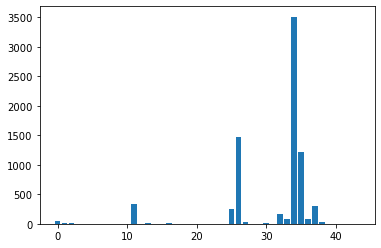

In [31]:


X=train.drop(['profit'],axis=1)
y=train['profit']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

# feature selection
def select_features(X_train, y_train, X_val):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_val)
	return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_val)
# what are scores for the features
for i,j in enumerate(X_train.columns):
	print('Feature %s: %f' % (j, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [32]:
def scaling(X):
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  return X
def detect_outlier(a):
  import numpy as np
  mean=np.mean(a)
  std=np.std(a)
  z_score=(a-mean)/std
  abs_z_scores = np.abs(z_score)
  print("Rows containing outliers: ", np.where(~(abs_z_scores < 3).all(axis=1)))
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  a = a[filtered_entries]
  return a

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
X_f=scaling(X_train)
X_ft=scaling(X_val)
y_f=np.ravel(y_train)
data_train=pd.concat([X_train,y_train],axis=1)
#X_of=detect_outlier(data_train)
#X_o=X_of.drop('profit',axis=1)
#y_o=X_of.profit

y_train_r=np.ravel(y_train)
#y=np.ravel(y)
model={'log':LinearRegression(),'random':RandomForestRegressor(n_estimators=1000,random_state=1),'exr':ExtraTreesRegressor(n_estimators=10000),'gbr':GradientBoostingRegressor()}#,'linear':SVC(kernel='linear',class_weight='balanced',probability=True)}#,'poly':SVC(kernel='poly'),
for i in model:
  cls=model[i]
  cls.fit(X_train,y_train)
  y_pred=cls.predict(X_val)
  
  error=metrics.mean_absolute_error(y_val,y_pred)
  
  print('Mean abs error ',model[i] ,'is ',error)
  print("r2 score : %0.2f" %(metrics.r2_score(y_val,y_pred)))
  #print("Confusion Matrix: \n\n",confusion_matrix(y_val,y_p))
  #print("\n\nReport: \n\n",classification_report(y_val,y_p))
  
  clf_f = model[i]
  clf_f.fit(X_f , y_f)
  y_p_f=clf_f.predict(X_ft)
  y_pred_f = clf_f.predict(X_ft)
  print("mean_abs_score_after_feature_scaling : %0.2f" %(metrics.mean_absolute_error(y_val,y_pred_f)))
  print("r2 score : %0.2f" %(metrics.r2_score(y_val,y_pred_f)))
  

Mean abs error  LinearRegression() is  37.220239875423374
r2 score : 0.78
mean_abs_score_after_feature_scaling : 121802076839994.56
r2 score : -2263173463914905444810752.00
Mean abs error  RandomForestRegressor(n_estimators=1000, random_state=1) is  21.3874845324577
r2 score : 0.63
mean_abs_score_after_feature_scaling : 29.28
r2 score : 0.31
Mean abs error  ExtraTreesRegressor(n_estimators=10000) is  19.877393830955167
r2 score : 0.67
mean_abs_score_after_feature_scaling : 27.30
r2 score : 0.49
Mean abs error  GradientBoostingRegressor() is  24.233087687775715
r2 score : 0.66
mean_abs_score_after_feature_scaling : 30.61
r2 score : -0.06
